In [3]:
import numpy as np


#Generates N nodes and returns an array of tuples of their position.
def N_node_gen(N):
    node_list = list()
    for _ in range(N):
        node_list.append(np.array((np.random.random(), np.random.random())))
    return node_list

test_nodes = N_node_gen(5)
test_nodes

[array([0.41445593, 0.62626048]),
 array([0.8189678 , 0.48445324]),
 array([0.9100902 , 0.57530345]),
 array([0.03192033, 0.57278794]),
 array([0.80916519, 0.95000723])]

In [4]:
import numpy as np

#Returns adjacency matrix of the generated graph

def adj_mat_gen(node_list, R):
    N = len(node_list)
    adj_mat = np.zeros((N, N), dtype=np.float64)
    for i in range(N):
        for j in range(i+1, N):
            dist = np.linalg.norm(node_list[i]-node_list[j])
            if dist < R:
                adj_mat[i, j] = 1 - dist/R
                adj_mat[j, i] = 1 - dist/R
    return adj_mat

test_adj_mat = adj_mat_gen(test_nodes, 0.5)

test_adj_mat

array([[0.        , 0.1427039 , 0.00350624, 0.22749033, 0.        ],
       [0.1427039 , 0.        , 0.74265157, 0.        , 0.06868564],
       [0.00350624, 0.74265157, 0.        , 0.        , 0.2238846 ],
       [0.22749033, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.06868564, 0.2238846 , 0.        , 0.        ]])

In [5]:
#Produces the matrix W(i)

def W_i_gen(i, adj_mat, gamma):
    i -= 1
    W_i = np.zeros(np.shape(adj_mat), dtype=np.float64)
    N = np.shape(adj_mat)[0]
    for j in range(N):
        if adj_mat[i, j]:
            val = adj_mat[i, j].item()
            W_i[j, j] = gamma * val
            W_i[j, i] = 1 - gamma * val
        else:
            W_i[j, j] = 1
    return W_i

test_W_1 = W_i_gen(1, test_adj_mat, 0.5)

test_W_1

array([[1.        , 0.        , 0.        , 0.        , 0.        ],
       [0.92864805, 0.07135195, 0.        , 0.        , 0.        ],
       [0.99824688, 0.        , 0.00175312, 0.        , 0.        ],
       [0.88625483, 0.        , 0.        , 0.11374517, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.        ]])

In [6]:
#A single step of the simulation

def update_step(x, adj_mat, gamma):
    N = len(x)
    i = np.random.randint(N, size=1)
    W_i = W_i_gen(i, adj_mat, gamma)
    return np.matmul(W_i, x)

test_x = np.random.random(size=5)
update_step(test_x, test_adj_mat, 0.5)

array([0.42527858, 0.41792373, 0.35405713, 0.20192901, 0.42143132])

In [7]:
import numpy as np

def simulate(x_0, adj_mat, gamma, time):
    x_list = [x_0]
    for t in range(1, time+1):
        x_list.append(update_step(x_list[-1], adj_mat, gamma))
    return np.array(x_list)

test_x = np.random.random(size=5)
test_simulation = simulate(test_x, test_adj_mat, 0.5, 10)
test_simulation

array([[0.22158854, 0.81216728, 0.14598732, 0.8398134 , 0.74813321],
       [0.22158854, 0.75033232, 0.68072762, 0.8398134 , 0.74813321],
       [0.67992269, 0.70657364, 0.68072762, 0.8398134 , 0.68827316],
       [0.82162661, 0.70657364, 0.68072762, 0.8398134 , 0.68827316],
       [0.71478289, 0.70657364, 0.69697635, 0.8398134 , 0.70594515],
       [0.70715939, 0.70657364, 0.70300992, 0.8398134 , 0.70655206],
       [0.70301719, 0.70433322, 0.70300992, 0.8398134 , 0.70340643],
       [0.70423932, 0.70433322, 0.70384184, 0.8398134 , 0.70430139],
       [0.70423932, 0.70424602, 0.70423862, 0.71966021, 0.70430139],
       [0.70423932, 0.70429949, 0.70429436, 0.71966021, 0.70430139],
       [0.71790616, 0.70429949, 0.70429436, 0.71966021, 0.70430139]])

# This Cell sets up the rest of the simulations in this section!

In [86]:
N = 50
R = 2*np.sqrt(np.log(N)/N)
time = 10000
gamma = 0.5

node_list = N_node_gen(N)
adj_mat = adj_mat_gen(node_list, R)

x_0 = np.random.random(N)

In [87]:
#The following code investigates convergence in expectation to the initial value

simulate_num = 1000
desired_x = 1/N * np.sum(x_0) * np.ones(N)

x = np.zeros(N)
for _ in range(simulate_num):
    x += simulate(x_0, adj_mat, gamma, time = 100)[-1]
x /= simulate_num

print(np.linalg.norm(x - desired_x))

0.03823408744592403


In [ ]:
#Convergence in expectation data generation

sim_num = 1000

desired_x = np.mean(x_0) * np.ones(N)

node_list = N_node_gen(N)
adj_mat = adj_mat_gen(node_list, R)

t_array = np.array([_ for _ in range(t+1)])
x_array = np.zeros((time+1, N))

for _ in range(sim_num):
    x_array += simulate(x_0, adj_mat, gamma, t)

x_array /= sim_num
x_array -= desired_x

plot_vals = np.linalg.norm(x_array, axis=1)

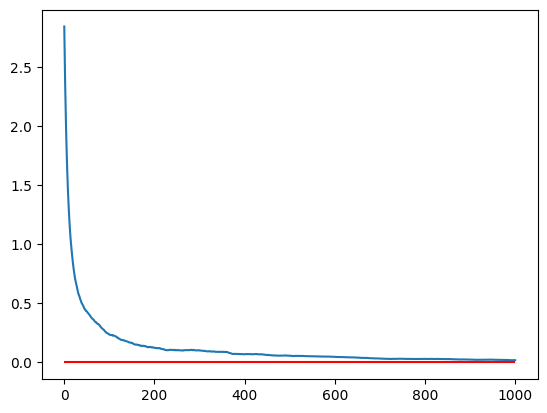

In [ ]:
#Convergence in expectation plot

import matplotlib.pyplot as plt

plt.plot(t_array, plot_vals)
plt.hlines(0, 0, 1000, colors='r')

In [ ]:
#Convergence in second moment data generation

t = time
sim_num = 1000

x_0 = np.random.random(N)
beta_matrix = np.identity(N) - 1/N * np.ones((N, N))
t_array = np.array([_ for _ in range(t+1)])
beta_arr = np.zeros((t+1, N), dtype=np.float64)

for _ in range(sim_num):
    output = simulate(x_0, adj_mat, gamma, t)
    for i in range(t+1):
        beta_arr[i] += beta_matrix@output[i]

plot_vals_2 = np.linalg.norm(beta_arr, axis=1)
plot_vals_2 /= sim_num

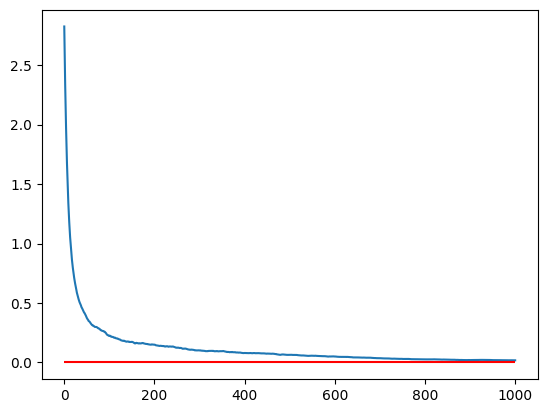

In [39]:
#Convergence in second moment plot

import matplotlib.pyplot as plt

plt.plot(t_array, plot_vals_2)
plt.hlines(0, 0, 1000, colors='r')

In [ ]:
#Mean Square Error Data Generation

t = time
sim_num = 1000

x_0 = np.random.random(N)
J = np.ones([N, N])
x_expected = np.mean(x_0) * np.ones(N)
t_array = np.array([_ for _ in range(t+1)])
alpha_arr = np.zeros((t+1, N), dtype=np.float64)

for _ in range(sim_num):
    output = simulate(x_0, adj_mat, gamma, t)
    for i in range(t+1):
        alpha_arr[i] += output[i] - x_expected
    alpha_arr[-1]

plot_vals_3 = np.linalg.norm(alpha_arr, axis=1)
plot_vals_3 /= sim_num

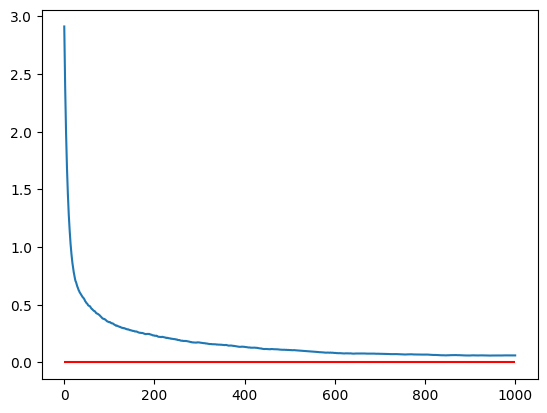

In [47]:
#Mean Square Error plot

import matplotlib.pyplot as plt

plt.plot(t_array, plot_vals_3)
plt.hlines(0, 0, 1000, colors='r')

In [74]:
import numpy as np

def simulate_cutoff_at_conv(x_0, adj_mat, gamma, eps=0.01, t_max = 5000):
    x_list = [x_0]
    t = 1
    N = len(x_0)
    while True:
        x_list.append(update_step(x_list[-1], adj_mat, gamma))
        if np.linalg.norm(x_list[-1] - np.mean(x_list[-1]) * np.ones(N))**2/N < eps or t >= t_max:
            break
        t += 1
    return np.array(x_list)

test_x = np.random.random(size=5)
test_simulation = simulate_cutoff_at_conv(test_x, test_adj_mat, 0.5)
test_simulation

array([[0.02477537, 0.90647199, 0.10627839, 0.51559421, 0.90382014],
       [0.45976594, 0.90647199, 0.10627839, 0.51559421, 0.90382014],
       [0.10689809, 0.40341091, 0.10627839, 0.51559421, 0.19555704],
       [0.10689809, 0.20269533, 0.18556299, 0.51559421, 0.19555704],
       [0.10689809, 0.11373341, 0.107036  , 0.1533853 , 0.19555704]])

In [95]:
import numpy as np

def simulate_return_var(x_0, adj_mat, gamma, t):
    x_list = [x_0]
    N = len(x_0)
    for t in range(1, t+1):
        x_list.append(update_step(x_list[-1], adj_mat, gamma))
    return np.linalg.norm(x_list[-1] - np.mean(x_list[-1]) * np.ones(N))**2/N

test_x = np.random.random(size=5)
test_simulation = simulate_return_var(test_x, test_adj_mat, 0.5, 5)
test_simulation

np.float64(0.04802515141868644)

In [98]:
t_array = np.arange(50, 5000, 50, dtype=np.int64)
var_array = np.zeros(t_array.shape, dtype=np.float64)

for i in range(len(var_array)):
    var_array[i] = simulate_return_var(x_0, adj_mat, gamma, t_array[i])

var_array

array([1.32416854e-14, 6.85946196e-17, 2.15704154e-33, 3.69778549e-34,
       1.18329136e-32, 1.04770589e-33, 4.93038066e-34, 1.72563323e-32,
       2.46519033e-33, 9.09038934e-34, 2.46519033e-33, 9.24446373e-35,
       1.18329136e-32, 1.33120278e-32, 3.30335504e-32, 8.87468518e-33,
       3.20474743e-33, 2.71170936e-33, 1.72563323e-33, 1.50376610e-32,
       6.16297582e-34, 1.47911420e-33, 4.46815747e-34, 3.51289622e-33,
       9.24446373e-35, 1.42981039e-32, 2.46519033e-34, 1.97215226e-33,
       8.62816615e-34, 1.94750036e-32, 1.10933565e-32, 1.28189897e-32,
       9.24446373e-34, 9.86076132e-34, 3.20474743e-33, 1.35585468e-32,
       2.73636126e-32, 5.22620350e-32, 1.91052250e-33, 1.33120278e-32,
       5.11526993e-33, 8.32001736e-34, 3.63615574e-33, 7.85779417e-34,
       4.83177304e-32, 2.61310175e-32, 5.17689969e-33, 2.71170936e-33,
       4.56060211e-33, 9.86076132e-34, 7.08742220e-34, 1.10933565e-32,
       1.08333559e-35, 9.86076132e-33, 1.42518816e-34, 2.34963453e-34,
      

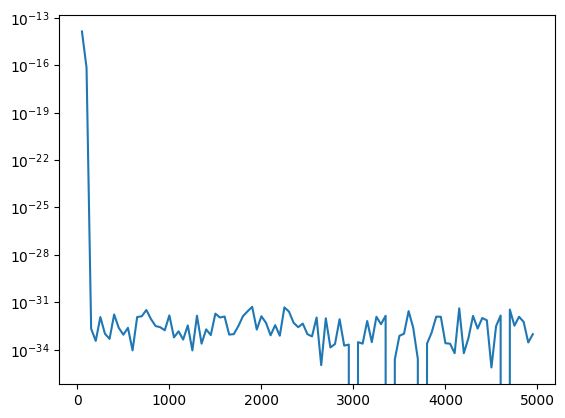

In [100]:
plt.semilogy(t_array, var_array)